In [1]:
# import necessary libraries
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy
import matplotlib.pyplot as plt


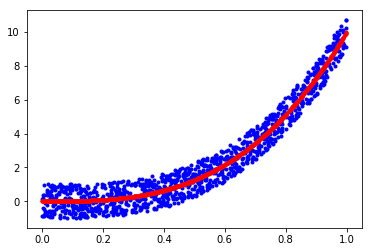

In [16]:
# Code for Question 1(a)
# Generate noisy data sample from the cubic function y = 10 * x^3

numSamples = 1200
X = numpy.random.rand(numSamples, 1)
y = 10*X*X*X + 2* numpy.random.rand(numSamples, 1) - 1
y2 = 10*X*X*X

# For better understanding of the data generated, visualize it and have the ideal curve of y = x^3 as a reference
%matplotlib inline
plt.plot(X, y, "b.", label = "data_with_noise")
plt.plot(X, y2, "r.", label = "ideal_curve")

In [17]:
# Code for Question 1(b)
# Split training/teting data by 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [18]:
# Code for Question 1(c) 1/3
# The function to create train/test split and draw learning curves of a given model
# Here the increment of training data is set to 7 every time, thus have 120 training sizes.

def plot_learning_curves(model, X, y):
    train_errors, test_errors = [], []
    for m in range(1, 120):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        X_train = X_train[:7*m]
        y_train = y_train[:7*m]
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        
    plt.plot(numpy.sqrt(train_errors), "r-", linewidth = 2, label = "train")
    plt.plot(numpy.sqrt(test_errors), "b-", linewidth = 2, label = "test")
    #plt.plot(numpy.sqrt(train_errors)+numpy.sqrt(test_errors), "r-", linewidth = 2, label = "train")

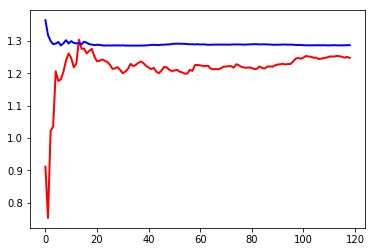

In [19]:
# Code for Question 1(c) 2/3
# Train with linear model and plot the learning curves for both training and test data
plot_learning_curves(linear_model.LinearRegression(), X, y)

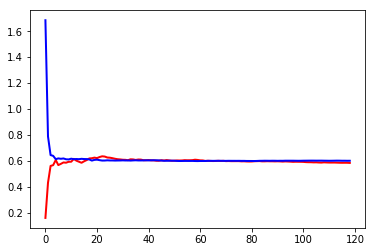

In [20]:
# Code for Question 1(c) 3/3
# Train with polynomial features for model and plot the learning curves for both training and test data
poly_features = PolynomialFeatures(degree=4, include_bias = False)
X_poly = poly_features.fit_transform(X)
plot_learning_curves(linear_model.LinearRegression(), X_poly, y)

In [36]:
# Code for Question 2(a) 
# Import the database load_diabetes from sklearn, which contains 442 instance
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()
diabetes_data.keys()
print(diabetes_data.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [37]:
# Code for Question 2(b)
# Split training/teting data by 70/30
X = diabetes_data.data
y = diabetes_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [38]:
# Code for Question 2(c) 1/5
# The function train and evaluate a given model using mean squared errors

def train_and_evaluate(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    model = model.fit(X_train, y_train)
    y_test_predict = model.predict(X_test)
    errors = mean_squared_error(y_test_predict, y_test)
    print('The mean squared errors: ',errors)
    print('The coefficients: ',model.coef_)

In [39]:
# Code for Question 2(c) 2/5
# Train with linear model and evaluate its performance
train_and_evaluate(linear_model.LinearRegression(), X, y)

The mean squared errors:  2821.7385595843757
The coefficients:  [  29.25034582 -261.70768053  546.29737263  388.40077257 -901.95338706
  506.761149    121.14845948  288.02932495  659.27133846   41.37536901]


In [51]:
# Code for Question 2(c) 3/5
# Train with ridge model and evaluate its performance
train_and_evaluate(linear_model.Ridge(alpha = 0.1), X, y)

The mean squared errors:  2805.3938458411744
The coefficients:  [  39.661721   -213.84757722  505.91234216  341.71782741 -108.80556421
  -70.57764673 -211.90801084  160.192746    332.77486147   77.67983506]


In [49]:
# Code for Question 2(c) 4/5
# Train with lasso model and evaluate its performance
train_and_evaluate(linear_model.Lasso(alpha = 0.1), X, y)

The mean squared errors:  2775.1600440020425
The coefficients:  [   0.         -173.27234183  558.93537748  339.35670724  -58.72262052
   -0.         -274.11401212    0.          372.84221354   25.58549157]


In [52]:
# Code for Question 2(c) 5/5
# Train with polynomial model and evaluate its performance
poly_features = PolynomialFeatures(degree=10, include_bias = False)
X_poly = poly_features.fit_transform(X)
train_and_evaluate(linear_model.LinearRegression(), X_poly, y)

The mean squared errors:  192254.3864104932
The coefficients:  [2249.79214694 -351.88372259  771.49451262 ...   13.78970111   11.0716629
   -3.16877976]


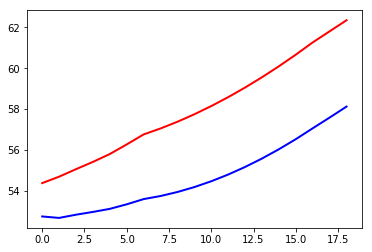

In [22]:
# Code for Question 3(b) 1/2
# Train with lasso model while varying its alpha and evaluate its performance

def vary_Alpha_Lasso(X, y):
    train_errors,test_errors = [],[]
    for m in range(1, 20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        lasso_model = linear_model.Lasso(alpha = 0.05*m).fit(X_train, y_train)
        y_train_predict = lasso_model.predict(X_train)
        y_test_predict = lasso_model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train))
        test_errors.append(mean_squared_error(y_test_predict, y_test))

    plt.plot(numpy.sqrt(train_errors), "r-", linewidth = 2, label = "train")
    plt.plot(numpy.sqrt(test_errors), "b-", linewidth = 2, label = "test")

vary_Alpha_Lasso(X, y)

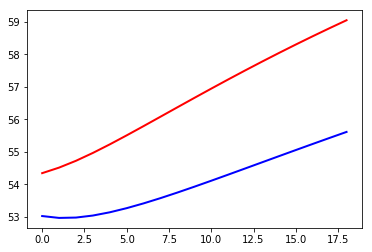

In [23]:
# Code for Question 3(b) 2/2
# Train with ridge model while varying its alpha and evaluate its performance

def vary_Alpha_Ridge(X, y):
    train_errors,test_errors = [],[]
    for m in range(1, 20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        ridge_model = linear_model.Ridge(alpha = 0.05*m).fit(X_train, y_train)
        y_train_predict = ridge_model.predict(X_train)
        y_test_predict = ridge_model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train))
        test_errors.append(mean_squared_error(y_test_predict, y_test))

    plt.plot(numpy.sqrt(train_errors), "r-", linewidth = 2, label = "train")
    plt.plot(numpy.sqrt(test_errors), "b-", linewidth = 2, label = "test")

vary_Alpha_Ridge(X, y)